# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Iris dataset

In [2]:
Xy = pd.read_csv('./datasets/iris.csv')
X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
b_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
b_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9, 0.8666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667]

Accuracy:
0.9566666666666667

Standard Deviation:
0.03511884584284246

Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               10                0               0
Iris-versicolor            0               11               1
Iris-virginica             0                0               8
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               12                0               0
Iris-versicolor            0               10               0
Iris-virginica             0                1               7
                 Iris-versicolor  Iris-setosa  

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,9,0,0
Iris-versicolor,0,9,0
Iris-virginica,0,0,9


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.9, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9, 0.9333333333333333, 0.8666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9, 0.9333333333333333, 0.8333333333333334, 0.9333333333333333, 0.9333333333333333, 0.8, 0.9333333333333333, 0.9666666666666667]

Accuracy:
0.9200000000000002

Standard Deviation:
0.04642796092394705

Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               10                0               0
Iris-versicolor            0               10               2
Iris-virginica             0                1               7
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               12                0               0
Iris-versicolor            0                8               2
Iris-virginica             0                1               7
                 Iris-versicolor  Iris-setosa  Iris-virginica


In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,9,0,0
Iris-versicolor,0,8,1
Iris-virginica,0,1,9


# Showing bayes informations computed

In [8]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.9333333333333333, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333]

Accuracy:
0.9716666666666667

Standard Deviation:
0.02420973174388991

Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               10                0               0
Iris-versicolor            0               10               2
Iris-virginica             0                0               8
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               12                0               0
Iris-versicolor            0               10               0
Iris-virginica             0                0               8
                 Iris-versicolor  Iris-setosa  Iris-virginic

In [9]:
confusion_matrix_mean(b_confusion_matrix_list)

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,9,0,0
Iris-versicolor,0,9,0
Iris-virginica,0,0,10


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[['sepal-length', 'sepal-width']], X_test[['sepal-length', 'sepal-width']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     sepal-length  sepal-width
122           7.7          2.8
98            5.1          2.5
3             4.6          3.1
146           6.3          2.5
116           6.5          3.0
..            ...          ...
87            6.3          2.3
0             5.1          3.5
145           6.7          3.0
33            5.5          4.2
36            5.5          3.5

[120 rows x 2 columns]
Test dataset:
     sepal-length  sepal-width
137           6.4          3.1
134           6.1          2.6
131           7.9          3.8
50            7.0          3.2
143           6.8          3.2
38            4.4          3.0
30            4.8          3.1
107           7.3          2.9
68            6.2          2.2
17            5.1          3.5
29            4.7          3.2
12            4.8          3.0
71            6.1          2.8
35            5.0          3.2
81            5.5          2.4
80            5.5          2.4
42            4.4          3.2
63            6.1

# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

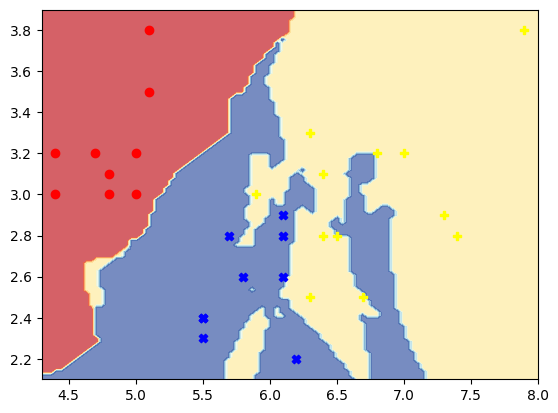

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

setosa = np.where(knn_y_pred == 'Iris-setosa')
virginica = np.where(knn_y_pred == 'Iris-virginica')
versicolor = np.where(knn_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting dmc decision surface

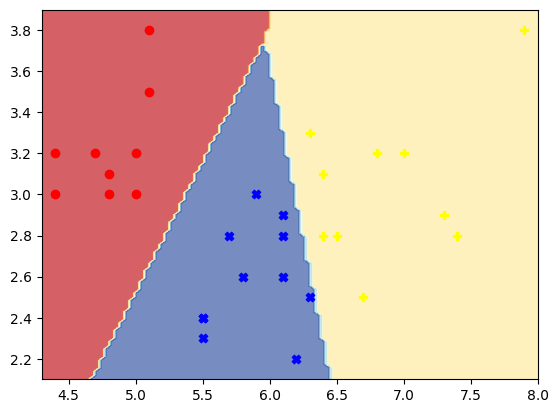

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

setosa = np.where(dmc_y_pred == 'Iris-setosa')
virginica = np.where(dmc_y_pred == 'Iris-virginica')
versicolor = np.where(dmc_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting bayes decision surface

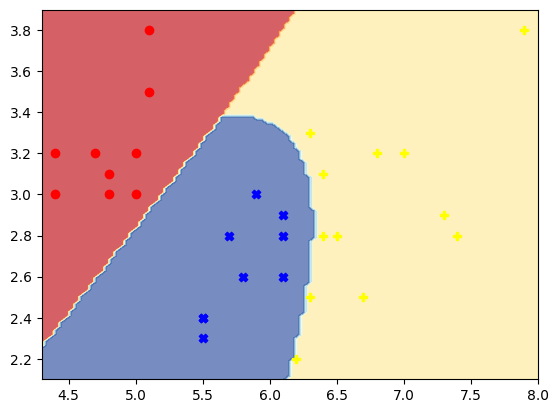

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    elif y == 'Iris-versicolor':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

setosa = np.where(b_y_pred == 'Iris-setosa')
virginica = np.where(b_y_pred == 'Iris-virginica')
versicolor = np.where(b_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()